In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


### Importing Modules and Libraries

In [2]:
! pip install seaborn

/bin/bash: /opt/conda/lib/libtinfo.so.6: no version information available (required by /bin/bash)


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [5]:
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [6]:
train_data = pd.read_csv('/kaggle/input/titanic/train.csv')
test_data = pd.read_csv('/kaggle/input/titanic/test.csv')
gender = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')

In [7]:
train_data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [8]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
len(train_data)

891

### Train Data

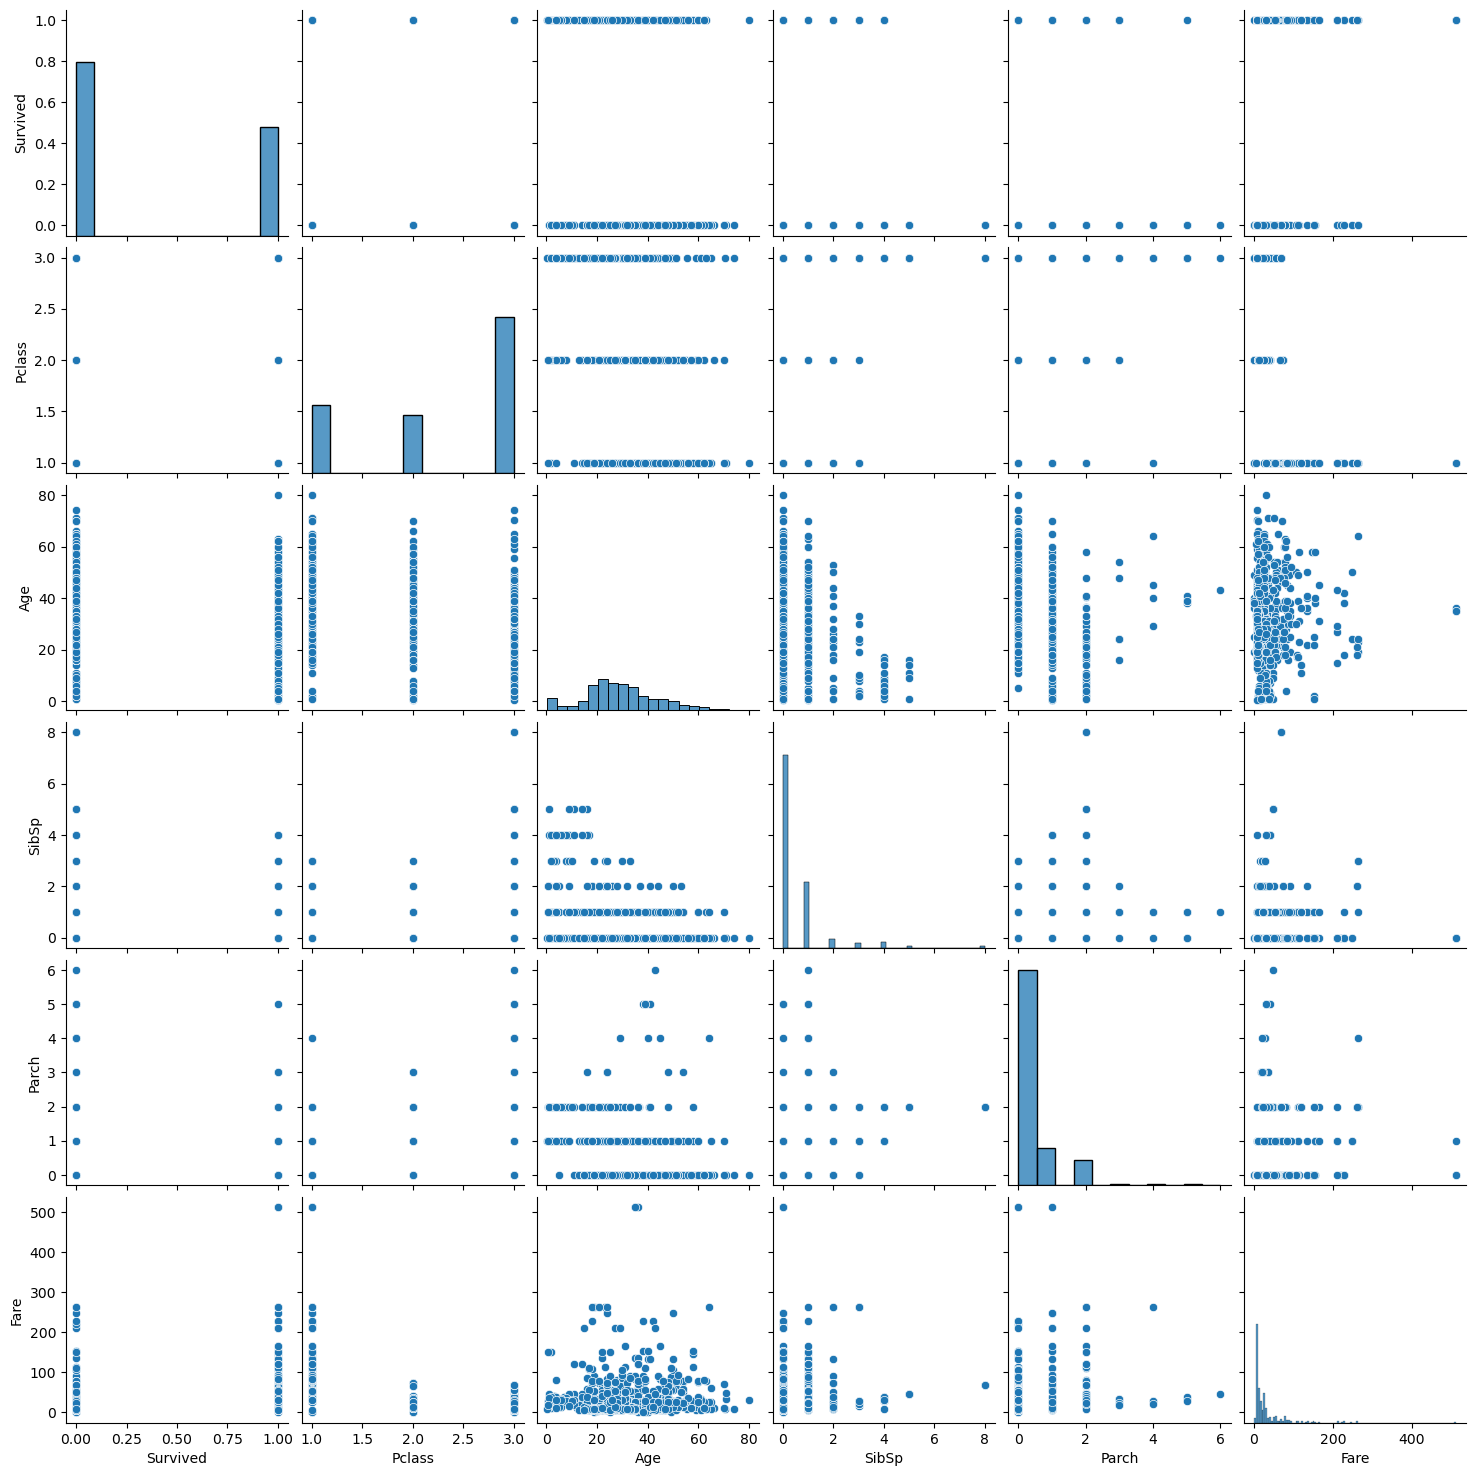

In [10]:
sns.pairplot(train_data.drop(columns='PassengerId'))

### Test Data

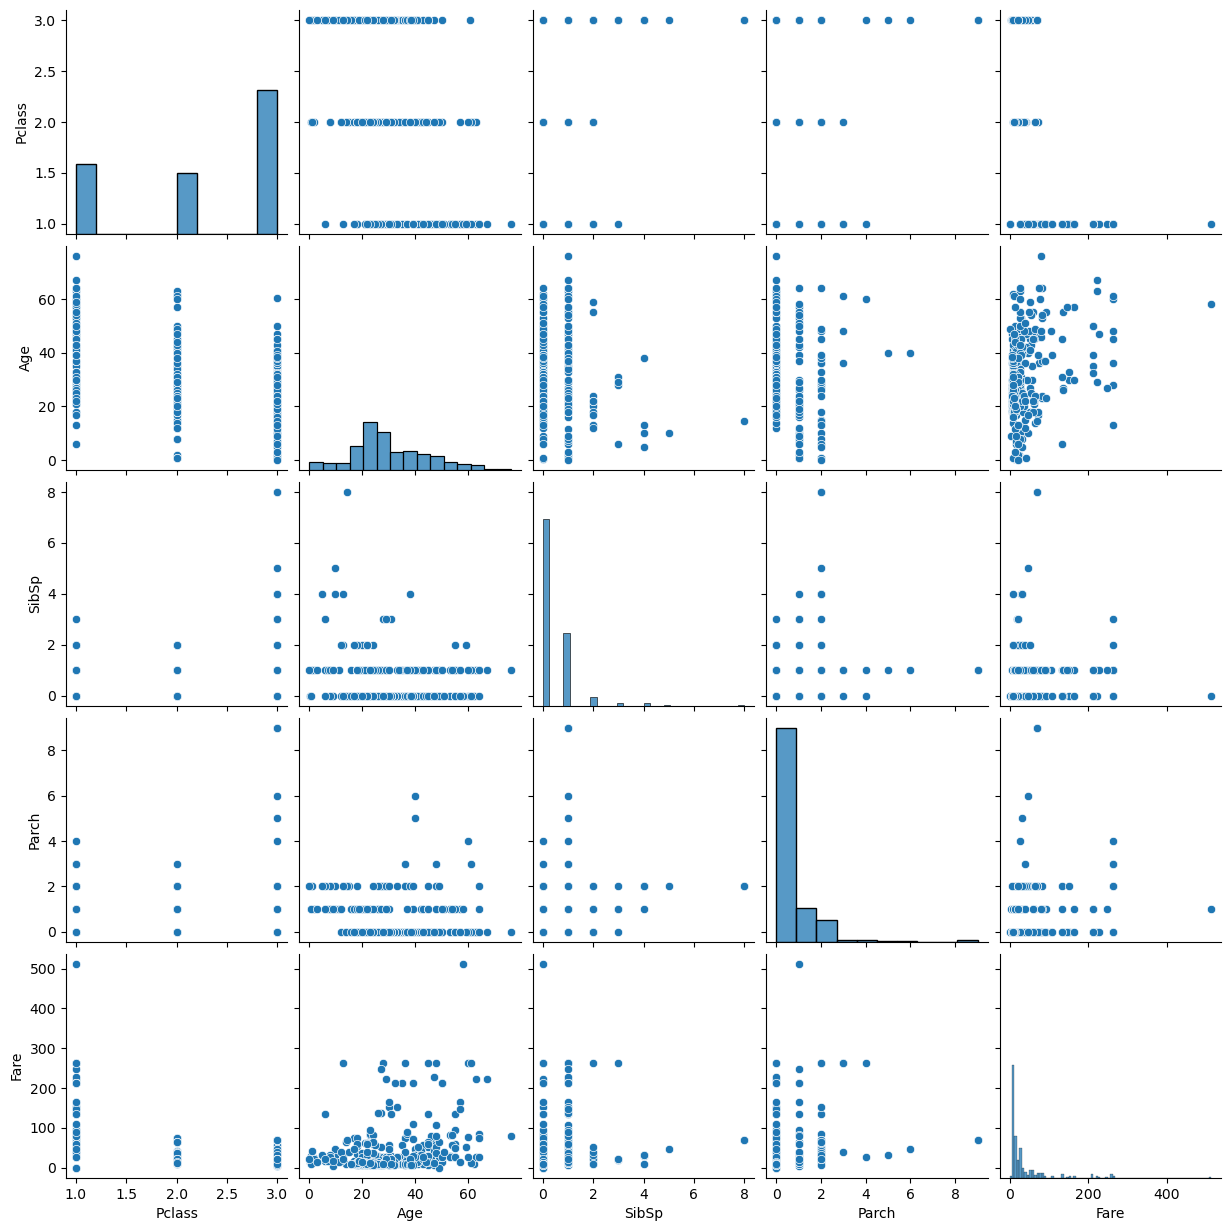

In [11]:
sns.pairplot(test_data.drop(columns=['PassengerId']))

In [12]:
train_data.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [13]:
train_data.Age.unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [14]:
train_data.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [15]:
train_data.Parch.unique()

array([0, 1, 2, 5, 3, 4, 6])

In [16]:
train_data = train_data.drop(columns=['Name','Fare','Cabin','Embarked','Ticket','Cabin'])

In [17]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch
0,1,0,3,male,22.0,1,0
1,2,1,1,female,38.0,1,0
2,3,1,3,female,26.0,0,0
3,4,1,1,female,35.0,1,0
4,5,0,3,male,35.0,0,0


In [18]:
len(train_data)

891

In [19]:
test_data.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [20]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [21]:
test_data = test_data.drop(columns=['Name','Fare','Cabin','Embarked','Ticket','Cabin'])

In [22]:
test_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch
0,892,3,male,34.5,0,0
1,893,3,female,47.0,1,0
2,894,2,male,62.0,0,0
3,895,3,male,27.0,0,0
4,896,3,female,22.0,1,1


In [23]:
train_data.SibSp.unique()

array([1, 0, 3, 4, 2, 5, 8])

In [24]:
train_data.Parch.unique()

array([0, 1, 2, 5, 3, 4, 6])

In [25]:
train_data_Sex = train_data['Sex']
test_data_Sex = test_data['Sex']
train_data = train_data.drop(columns=['Sex'])
test_data = test_data.drop(columns = ['Sex'])

In [26]:
test_data.head()

,PassengerId,Pclass,Age,SibSp,Parch
0,892,3,34.5,0,0
1,893,3,47.0,1,0
2,894,2,62.0,0,0
3,895,3,27.0,0,0
4,896,3,22.0,1,1


In [27]:
train_data_Sex.shape

(891,)

In [28]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()

In [29]:
train_data_Sex = ohe.fit_transform(train_data_Sex.to_numpy().reshape(-1,1)).toarray()
# 

In [30]:
test_data_Sex = ohe.fit_transform(test_data_Sex.to_numpy().reshape(-1,1)).toarray()

In [31]:
train_data_Sex[0]

array([0., 1.])

In [32]:
train_data_Sex = pd.DataFrame({'Sex':train_data_Sex[:,0]})

In [33]:
train_data_Sex.head()

,Sex
0,0.0
1,1.0
2,1.0
3,1.0
4,0.0


In [34]:
test_data_Sex = pd.DataFrame({'Sex':test_data_Sex[:,0]})

In [35]:
test_data_Sex.head()

,Sex
0,0.0
1,1.0
2,0.0
3,0.0
4,1.0


In [36]:
train_data = pd.concat([train_data,train_data_Sex],axis=1)
test_data = pd.concat([test_data,test_data_Sex],axis=1)

In [37]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Age            177
SibSp            0
Parch            0
Sex              0
dtype: int64

In [38]:
train_data['Age'] = train_data.groupby(['Sex','Pclass'])['Age'].apply(lambda row : row.fillna(row.mean()))
train_data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Sex
0,1,0,3,22.00,1,0,0.0
1,2,1,1,38.00,1,0,1.0
2,3,1,3,26.00,0,0,1.0
3,4,1,1,35.00,1,0,1.0
4,5,0,3,35.00,0,0,0.0
...,...,...,...,...,...,...,...
886,887,0,2,27.00,0,0,0.0
887,888,1,1,19.00,0,0,1.0
888,889,0,3,21.75,1,2,1.0
889,890,1,1,26.00,0,0,0.0


In [39]:
test_data['Age'] = test_data.groupby(['Sex','Pclass'])['Age'].apply(lambda row : row.fillna(row.mean()))
test_data

,PassengerId,Pclass,Age,SibSp,Parch,Sex
0,892,3,34.500000,0,0,0.0
1,893,3,47.000000,1,0,1.0
2,894,2,62.000000,0,0,0.0
3,895,3,27.000000,0,0,0.0
4,896,3,22.000000,1,1,1.0
...,...,...,...,...,...,...
413,1305,3,24.525104,0,0,0.0
414,1306,1,39.000000,0,0,1.0
415,1307,3,38.500000,0,0,0.0
416,1308,3,24.525104,0,0,0.0


In [40]:
len(train_data)

891

In [41]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Sex            0
dtype: int64

### Model Selection and Training

In [42]:
sc = StandardScaler()
train_data_sc = sc.fit_transform(train_data.drop(columns=['PassengerId','Survived']))

test_data_sc = sc.fit_transform(test_data.drop(columns=['PassengerId']))

In [43]:
train_data_X = train_data_sc
train_data_Y = train_data[['PassengerId','Survived']]

In [44]:
test_data.head()

,PassengerId,Pclass,Age,SibSp,Parch,Sex
0,892,3,34.5,0,0,0.0
1,893,3,47.0,1,0,1.0
2,894,2,62.0,0,0,0.0
3,895,3,27.0,0,0,0.0
4,896,3,22.0,1,1,1.0


In [45]:
len(train_data[:500])

500

In [46]:
rfe = RandomForestClassifier()
rfe.fit(train_data_X[:500],train_data_Y.drop(columns=['PassengerId'])[:500].to_numpy().ravel())
train_data_pred = rfe.predict(train_data_X[500:])

In [47]:
pred_acc_rfe = accuracy_score(train_data_Y.drop(columns=['PassengerId'])[500:].to_numpy().ravel(),train_data_pred)

In [48]:
pred_acc_rfe

0.7800511508951407

In [49]:
dtree = DecisionTreeClassifier()
dtree.fit(train_data_X[:500],train_data_Y.drop(columns=['PassengerId'])[:500].to_numpy().ravel())
train_data_pred = dtree.predict(train_data_X[500:])

In [50]:
pred_acc_dtree = accuracy_score(train_data_Y.drop(columns=['PassengerId'])[500:].to_numpy().ravel(),train_data_pred)
pred_acc_dtree

0.7647058823529411

In [51]:
svc = SVC()
svc.fit(train_data_X[:500],train_data_Y.drop(columns=['PassengerId'])[:500].to_numpy().ravel())
train_data_pred = svc.predict(train_data_X[500:])

In [52]:
pred_acc_svc = accuracy_score(train_data_Y.drop(columns=['PassengerId'])[500:].to_numpy().ravel(),train_data_pred)
pred_acc_svc

0.8235294117647058

In [53]:
lg = LogisticRegression()
lg.fit(train_data_X[:500],train_data_Y.drop(columns=['PassengerId'])[:500].to_numpy().ravel())
train_data_pred = lg.predict(train_data_X[500:])

In [54]:
pred_acc_lg = accuracy_score(train_data_Y.drop(columns=['PassengerId'])[500:].to_numpy().ravel(),train_data_pred)
pred_acc_lg

0.7902813299232737

In [55]:
y_pred = svc.predict(test_data_sc)
y_pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [56]:
test_data['PassengerId'].to_numpy()

array([ 892,  893,  894,  895,  896,  897,  898,  899,  900,  901,  902,
        903,  904,  905,  906,  907,  908,  909,  910,  911,  912,  913,
        914,  915,  916,  917,  918,  919,  920,  921,  922,  923,  924,
        925,  926,  927,  928,  929,  930,  931,  932,  933,  934,  935,
        936,  937,  938,  939,  940,  941,  942,  943,  944,  945,  946,
        947,  948,  949,  950,  951,  952,  953,  954,  955,  956,  957,
        958,  959,  960,  961,  962,  963,  964,  965,  966,  967,  968,
        969,  970,  971,  972,  973,  974,  975,  976,  977,  978,  979,
        980,  981,  982,  983,  984,  985,  986,  987,  988,  989,  990,
        991,  992,  993,  994,  995,  996,  997,  998,  999, 1000, 1001,
       1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010, 1011, 1012,
       1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1023,
       1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032, 1033, 1034,
       1035, 1036, 1037, 1038, 1039, 1040, 1041, 10

In [57]:
df_final = pd.DataFrame({"PassengerId":test_data["PassengerId"].to_numpy(),"Survived":y_pred})

In [58]:
df_final

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


### A little Cheat -> (Not applied here !)

* First choose the best fit model 
* The run the below code with that model
* In my case it is SVC yours may be differ

In [59]:
len(train_data_X),len(train_data_Y.drop(columns=['PassengerId']).to_numpy().ravel())

(891, 891)

In [60]:
from sklearn.model_selection import train_test_split

max_acc = 0
max_acc_idx = 0
for i in range(1000):
    X_train,X_test,Y_train,Y_test = train_test_split(train_data_X,train_data_Y.drop(columns='PassengerId').to_numpy().ravel(),test_size = 0.2, random_state = i)
    svc.fit(X_train,Y_train)
    Y_pred = svc.predict(X_test)
    acc_ = accuracy_score(Y_test,Y_pred)
    if acc_ > max_acc:
        max_acc = acc_
        max_acc_idx = i

In [61]:
max_acc

0.9106145251396648

In [62]:
max_acc_idx

555

In [63]:
df_final.to_csv('/kaggle/working/submission.csv',index=False)
df_final.to_csv('submission.csv',index=False)